# Frequently used shipping routes (300 gross tonnes and above) 

- <https://data.gov.ie/dataset/frequently-used-routes-300-gross-tonnes-and-above1>
- <https://data-housinggovie.opendata.arcgis.com/maps/housinggovie::frequently-used-routes-300-gross-tonnes-and-above>

In [1]:
import os
from zipfile import ZipFile

import contextily as cx
import matplotlib.pyplot as plt

from h2ss import data as rd

In [2]:
# base data download directory
DATA_DIR = os.path.join("data", "shipping")

URL = (
    "https://data-housinggovie.opendata.arcgis.com/datasets/"
    "housinggovie::frequently-used-routes-300-gross-tonnes-and-above.zip?"
    "outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D"
)

FILE_NAME = "shipping_frequently_used_routes.zip"

DATA_FILE = os.path.join(DATA_DIR, FILE_NAME)

# basemap cache directory
cx.set_cache_dir(os.path.join("data", "basemaps"))

In [15]:
plt.rcParams["xtick.major.size"] = 0
plt.rcParams["ytick.major.size"] = 0

In [3]:
rd.download_data(url=URL, data_dir=DATA_DIR, file_name=FILE_NAME)

Data 'shipping_frequently_used_routes.zip' already exists in 'data/shipping'.
Data downloaded on: 2023-10-29 18:08:57.570206+00:00
Download URL: https://data-housinggovie.opendata.arcgis.com/datasets/housinggovie::frequently-used-routes-300-gross-tonnes-and-above.zip?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D
SHA256 hash: fc1e7aea79a3c7f5628d7c8d0cea57dcb1c8fa8cdf3d7ebaa33135e5cd6c4ab7



In [4]:
ZipFile(DATA_FILE).namelist()

['Ports_Harbours_and_Shipping.shp',
 'Ports_Harbours_and_Shipping.shx',
 'Ports_Harbours_and_Shipping.dbf',
 'Ports_Harbours_and_Shipping.cpg',
 'Ports_Harbours_and_Shipping.prj',
 'Ports_Harbours_and_Shipping.xml']

In [5]:
data = rd.read_shapefile_from_zip(data_path=DATA_FILE)

In [6]:
data.shape

(46, 14)

In [7]:
data.head()

,key_,units,Last_Updat,Policy01_N,Policy02_N,Policy03_N,Policy04_N,Owning_Org,Metadata_L,weight,Map_Featur,OBJECTID,Shape__Len,geometry
0,0.4 to 1,(h/sq.km/month),2019,"Ports, Harbours and Shipping Policy 1 \n\n","Ports, Harbours and Shipping Policy 2\n","Ports, Harbours and Shipping Policy 3\n","Ports, Harbours and Shipping Policy 4\n",EMODnet,https://emodnet.ec.europa.eu/geonetwork/emodne...,1,Frequently Used Routes (300 gross tonnes and a...,1,208283.537314,"MULTILINESTRING ((-1072161.157 7006189.852, -1..."
1,1 to 1.6,(h/sq.km/month),2019,"Ports, Harbours and Shipping Policy 1 \n\n","Ports, Harbours and Shipping Policy 2\n","Ports, Harbours and Shipping Policy 3\n","Ports, Harbours and Shipping Policy 4\n",EMODnet,https://emodnet.ec.europa.eu/geonetwork/emodne...,3,Frequently Used Routes (300 gross tonnes and a...,2,36666.933586,"LINESTRING (-1076107.194 7004892.917, -1074891..."
2,>1.6,(h/sq.km/month),2019,"Ports, Harbours and Shipping Policy 1 \n\n","Ports, Harbours and Shipping Policy 2\n","Ports, Harbours and Shipping Policy 3\n","Ports, Harbours and Shipping Policy 4\n",EMODnet,https://emodnet.ec.europa.eu/geonetwork/emodne...,4,Frequently Used Routes (300 gross tonnes and a...,3,137491.087182,"LINESTRING (-976741.034 6922877.290, -986670.8..."
3,0.4 to 1,(h/sq.km/month),2019,"Ports, Harbours and Shipping Policy 1 \n\n","Ports, Harbours and Shipping Policy 2\n","Ports, Harbours and Shipping Policy 3\n","Ports, Harbours and Shipping Policy 4\n",EMODnet,https://emodnet.ec.europa.eu/geonetwork/emodne...,2,Frequently Used Routes (300 gross tonnes and a...,4,35094.984413,"LINESTRING (-1102932.151 6886279.424, -1131115..."
4,>0 to 0.4,(h/sq.km/month),2019,"Ports, Harbours and Shipping Policy 1 \n\n","Ports, Harbours and Shipping Policy 2\n","Ports, Harbours and Shipping Policy 3\n","Ports, Harbours and Shipping Policy 4\n",EMODnet,https://emodnet.ec.europa.eu/geonetwork/emodne...,1,Frequently Used Routes (300 gross tonnes and a...,5,370243.963757,"LINESTRING (-1187376.620 6823800.559, -1190712..."


In [8]:
data.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
data = data.sort_values("weight", ascending=False)

In [10]:
data.weight.unique()

array([4, 3, 2, 1])

In [11]:
data.key_.unique()

array(['>1.6', '1 to 1.6', '0.4 to 1', '>0 to 0.4'], dtype=object)

In [12]:
data["weight"] = data["weight"].astype(str)

In [13]:
data["legend"] = data.weight + ": " + data.key_

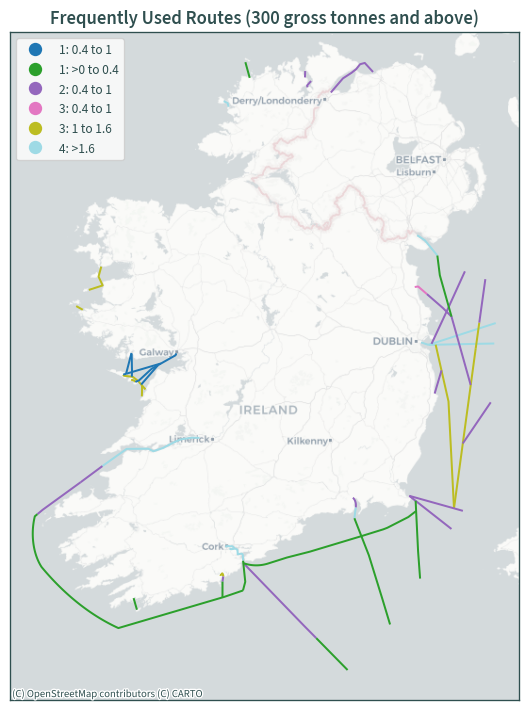

In [16]:
ax = data.plot(
    figsize=(7.5, 7.5),
    column="legend",
    legend=True,
    cmap="tab20",
    legend_kwds={"loc": "upper left"},
)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, zoom=7)

plt.title("Frequently Used Routes (300 gross tonnes and above)")

plt.tick_params(labelbottom=False, labelleft=False)
# ax.legend(list(data.key_.unique()))
plt.tight_layout()
plt.show()